In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

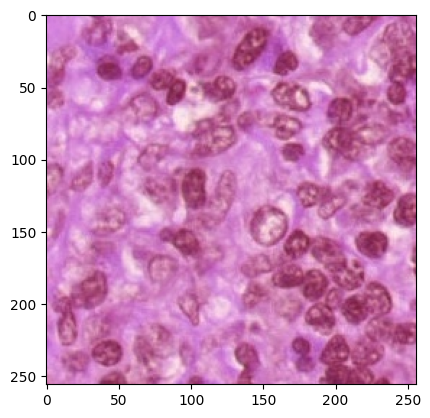

In [41]:
img = cv2.imread('/home/venkat/Projects/workbook/spear4Med/examples/HL/output/patchDir/sample.jpg')
# img = cv2.imread('../patch_position(64052_33548)_256_SingleRSC.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
output = img.copy()
plt.imshow(img)
plt.show()

In [42]:
def contour_threshold(img, thresh = 0):
    img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #get threshold image
    ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
    #find contours
    contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [43]:
def draw_and_plot(img, contours):
    cv2.drawContours(img, contours, -1, (0,255,0), 3)
    #result
    plt.imshow(img)
    plt.show()


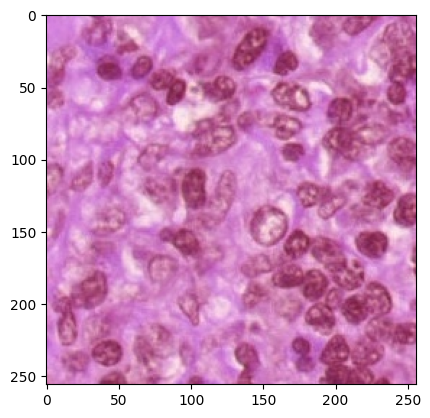

In [45]:
contours = contour_threshold(img, 400)
draw_and_plot(img, contours)

In [46]:
def generate_bbox(img, contours):
    count = 0
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        # draw the bounding rectangle
        if(w*h>700):
            img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            cropped_image = img[y:y+h, x:x+w]
            # cv2.imwrite(f'./threshold_test/patch_{count}.jpg', cropped_image)
            count +=1
        # print(w*h)
    plt.imshow(img)
    plt.show()

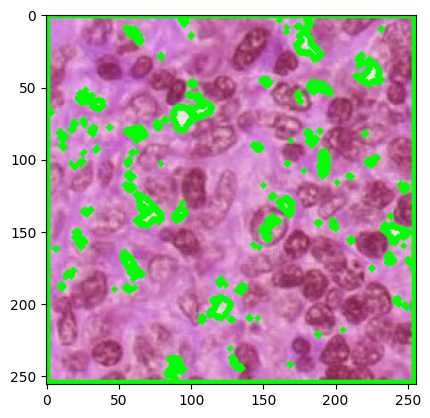

0


In [39]:
generate_bbox(img, contours)
print(len(contours))

In [40]:
img_nucleus = cv2.imread('./threshold_test/patch_13.jpg')
# img_nucleus = cv2.cvtColor(img_nucleus, cv2.COLOR_BGR2RGB)
nuclues_output = img_nucleus.copy()
plt.imshow(img_nucleus)
plt.show()

[ WARN:0@366.823] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./threshold_test/patch_13.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'copy'

In [21]:
contours = contour_threshold(img_nucleus, 100)
# draw_and_plot(img_nucleus, contours)
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if(w*h>200):
        print(w*h)  
        img_nucleus = cv2.rectangle(img_nucleus,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img_nucleus)
plt.show()
print(len(contours))

error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
#Clubbed Function
def find_rsc(img):
    count = 0

    contours = contour_threshold(img, 140)
    print(len(contours))
    width = img.shape[0]
    height = img.shape[1]
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        area = w*h
        # draw the bounding rectangle
        if(area>700 and (area)<(width*height)):
            nucleolus_count = 1
            # img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            cropped_image = img[y:y+h, x:x+w]
            cropped_contours = contour_threshold(cropped_image, 100)
            # print(f'patch{count}',len(cropped_contours))

            for cropC in cropped_contours:
                x,y,w,h = cv2.boundingRect(cropC)
                if(w*h>200 and w*h<area):
                    # print(w*h)
                    cropped_image = cv2.rectangle(cropped_image,(x,y),(x+w,y+h),(0,255,0),2)
                    # print(f'nucleolus {nucleolus_count}: {count}', w*h)
                    # nucleolus_count+=1
            # cv2.drawContours(cropped_image, contours, -1, (0,255,0), 3)
            cv2.imwrite(f'./threshold_test/patch_{count}.jpg', cropped_image)
            
            
            count +=1
    

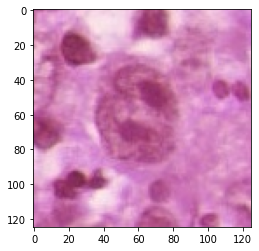

43


In [ ]:
patch = cv2.imread('../patch_position(64388_33704)_125_DoubleRSC.jpg')
patch = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)
plt.imshow(patch)
plt.show()
find_rsc(patch)

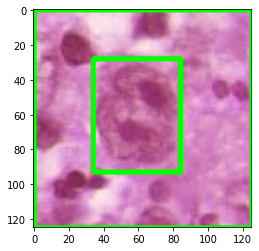

In [ ]:
patch = cv2.imread('../patch_position(64388_33704)_125_DoubleRSC.jpg')
patch = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)
contours = contour_threshold(patch, 140)
generate_bbox(patch, contours)

In [ ]:
#For 256 will have to right ratio of Nucleolus and Total Nuclues for Elimination

'''
1) Find The right combination for Nuclues using Hough Circle and create a simple extraction/bbox file for that,
    where we will add the color/hsv code or Threshold code later on for optimization
2) Run the circle with a particular color code and test it on 2-3 patches
3) Find the hsv ranges for all three types(a: Dark Maroon, b: Light Maroon, c: Eosinophil background's pink)

'''

"\n1) Find The right combination for Nuclues using Hough Circle and create a simple extraction/bbox file for that,\n    where we will add the color/hsv code or Threshold code later on for optimization\n2) Run the circle with a particular color code and test it on 2-3 patches\n3) Find the hsv ranges for all three types(a: Dark Maroon, b: Light Maroon, c: Eosinophil background's pink)\n\n"